In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("5. London Housing Data.csv")

In [4]:
data.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN


In [5]:
data.count()

date             13549
area             13549
average_price    13549
code             13549
houses_sold      13455
no_of_crimes      7439
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 635.2+ KB


In [8]:
data.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot: >

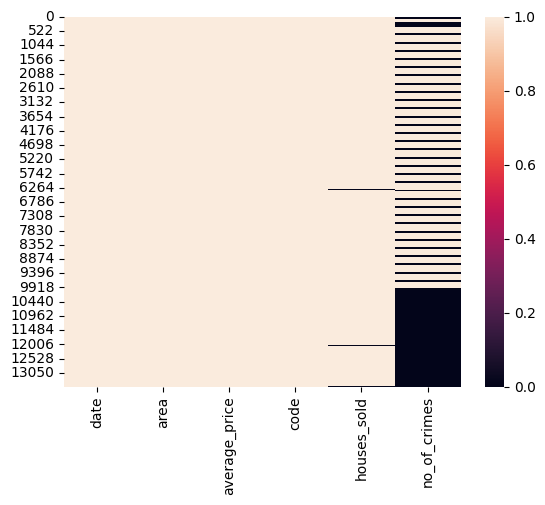

In [18]:
sns.heatmap(data.notnull())

In [19]:
data["date"] = pd.to_datetime(data["date"])

In [24]:
data.dtypes

date             datetime64[ns]
area                     object
average_price             int64
code                     object
houses_sold             float64
no_of_crimes            float64
dtype: object

In [28]:
data["year"] = data["date"].dt.year
data.insert(1,"month",data["date"].dt.month)

In [29]:

data

,date,month,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,1,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,2,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,3,city of london,79121,E09000001,14.0,NaN,1995
3,1995-04-01,4,city of london,77101,E09000001,7.0,NaN,1995
4,1995-05-01,5,city of london,84409,E09000001,10.0,NaN,1995
...,...,...,...,...,...,...,...,...
13544,2019-09-01,9,england,249942,E92000001,64605.0,NaN,2019
13545,2019-10-01,10,england,249376,E92000001,68677.0,NaN,2019
13546,2019-11-01,11,england,248515,E92000001,67814.0,NaN,2019
13547,2019-12-01,12,england,250410,E92000001,NaN,NaN,2019


In [31]:
data.drop(["year","month"],axis=1,inplace=True)

In [32]:
data.columns

Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes'], dtype='object')

In [34]:
data[data["no_of_crimes"]==0].count()

date             104
area             104
average_price    104
code             104
houses_sold      104
no_of_crimes     104
dtype: int64

In [38]:
data.columns

Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes'], dtype='object')

# What is the maximum & minimum "avarage_price" per year in England?

In [56]:
data["year"] = data["date"].dt.year
df1 = data[data["area"]=="england"]

In [57]:
df1.head()

,date,area,average_price,code,houses_sold,no_of_crimes,year
13248,1995-01-01,england,53203,E92000001,47639.0,NaN,1995
13249,1995-02-01,england,53096,E92000001,47880.0,NaN,1995
13250,1995-03-01,england,53201,E92000001,67025.0,NaN,1995
13251,1995-04-01,england,53591,E92000001,56925.0,NaN,1995
13252,1995-05-01,england,53678,E92000001,64192.0,NaN,1995


In [59]:
df1.groupby("year")["average_price"].max()


year
1995     53901
1996     55755
1997     61564
1998     65743
1999     75071
2000     84191
2001     95992
2002    119982
2003    138985
2004    160330
2005    167244
2006    182031
2007    194764
2008    191750
2009    174136
2010    180807
2011    177335
2012    180129
2013    188544
2014    203639
2015    219582
2016    231922
2017    242628
2018    248620
2019    250410
2020    247355
Name: average_price, dtype: int64

In [52]:
data["year"].value_counts()

1998    542
1996    542
1995    540
2009    540
2019    540
2018    540
2017    540
2016    540
2015    540
2014    540
2013    540
2012    540
2011    540
2010    540
2008    540
2007    540
2006    540
2005    540
2004    540
2003    540
2002    540
2001    540
2000    540
1999    540
1997    540
2020     45
Name: year, dtype: int64

In [64]:
data.columns

Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes',
       'year'],
      dtype='object')

In [65]:
data.groupby("area")["no_of_crimes"].max()

area
barking and dagenham      2049.0
barnet                    2893.0
bexley                    1914.0
brent                     2937.0
bromley                   2637.0
camden                    4558.0
city of london              10.0
croydon                   3263.0
ealing                    3401.0
east midlands                NaN
east of england              NaN
enfield                   2798.0
england                      NaN
greenwich                 2853.0
hackney                   3466.0
hammersmith and fulham    2645.0
haringey                  3199.0
harrow                    1763.0
havering                  1956.0
hillingdon                2819.0
hounslow                  2817.0
inner london                 NaN
islington                 3384.0
kensington and chelsea    2778.0
kingston upon thames      1379.0
lambeth                   4701.0
lewisham                  2813.0
london                       NaN
merton                    1623.0
newham                    3668.0
north